# Classifier
*Sreehari P S*
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Fetch processed dataframe from pickle file
***

In [2]:
file_name = 'social-media-adds.pkl'
pickle_file = open('./pickles/'+ file_name, 'rb')
data = pickle.load(pickle_file)
pickle_file.close()
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [3]:
#from pandas_profiling import ProfileReport

In [4]:
#profile = ProfileReport(data.iloc[:,1:4])

### Extracting features

In [5]:
data.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [6]:
X = data.drop(columns=['Purchased', 'User ID'], axis = 1)
y = data['Purchased']

In [7]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
def standard_scale_data(dataframe):
    return StandardScaler().fit_transform(data)

### Split data sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Check Model Accuracy

In [9]:
# Function to check model performances
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix
def check_model_metrices(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

### Build Models
***

#### 1. Multi Logistic Rregression

In [10]:
from sklearn.linear_model import LogisticRegression
rf = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train, y_train)
rf_pred = rf.predict(X_test)
check_model_metrices(y_test, rf_pred)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

Confusion Matrix = 
 [[52  0]
 [28  0]]


#### 2. Linear SVM
***

In [11]:
from sklearn.svm import SVC
linear = SVC(kernel='linear', decision_function_shape='ovo') # decision_function_shape is set to One-vs_One for multi-class
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
check_model_metrices(y_test, linear_pred)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        52
           1       0.83      0.68      0.75        28

    accuracy                           0.84        80
   macro avg       0.83      0.80      0.81        80
weighted avg       0.84      0.84      0.83        80

Confusion Matrix = 
 [[48  4]
 [ 9 19]]


#### 5. kNN Classifier
***

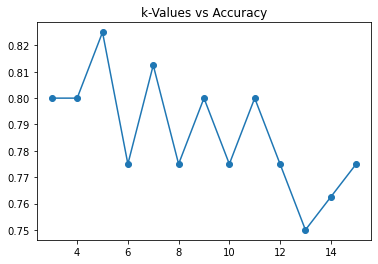

Best k value =  5
kNN classifier with k = 5 has :: 

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.77      0.71      0.74        28

    accuracy                           0.82        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80

Confusion Matrix = 
 [[46  6]
 [ 8 20]]


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def generate_kNN_model(x_train, y_train, x_test, k):
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn_model.fit(x_train, y_train)
    return knn_model.predict(x_test)

# Optimizing 'k' or 'n-neighbers' value
def find_optimal_k(x_train, y_train, x_test):
    accur_dict = dict()
    for k in np.arange(3,16):
        y_pred = generate_kNN_model(x_train, y_train, x_test, k)
        accur_dict[k] = accuracy_score(y_test, y_pred)
    #Plot
    plt.plot(list(accur_dict.keys()),list(accur_dict.values()), marker ='o')
    plt.title('k-Values vs Accuracy')
    plt.show()
    optimal_k = max(accur_dict, key = lambda x: accur_dict[x])
    print('Best k value = ', optimal_k)
    return optimal_k
k_optimal = find_optimal_k(X_train, y_train, X_test)
knn_y_pred = generate_kNN_model(X_train, y_train, X_test, k_optimal)
print(f'kNN classifier with k = {k_optimal} has :: \n')
check_model_metrices(y_test, knn_y_pred)

#### 6. Decision Trees
***

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
check_model_metrices(y_test, linear_pred)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        52
           1       0.83      0.68      0.75        28

    accuracy                           0.84        80
   macro avg       0.83      0.80      0.81        80
weighted avg       0.84      0.84      0.83        80

Confusion Matrix = 
 [[48  4]
 [ 9 19]]


#### 7. Random Forest
***

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
check_model_metrices(y_test, linear_pred)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        52
           1       0.83      0.68      0.75        28

    accuracy                           0.84        80
   macro avg       0.83      0.80      0.81        80
weighted avg       0.84      0.84      0.83        80

Confusion Matrix = 
 [[48  4]
 [ 9 19]]


#### 8. Naive Bayes Classifier
***

In [15]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
check_model_metrices(y_test, bnb_pred)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

Confusion Matrix = 
 [[52  0]
 [28  0]]


In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
check_model_metrices(y_test, gnb_pred)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix = 
 [[50  2]
 [ 3 25]]


In [17]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
check_model_metrices(y_test, mnb_pred)

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        52
           1       0.41      0.32      0.36        28

    accuracy                           0.60        80
   macro avg       0.54      0.54      0.53        80
weighted avg       0.58      0.60      0.59        80

Confusion Matrix = 
 [[39 13]
 [19  9]]


***